## Project 4 - UDACITY_NANODEGREE_FUNDAMENTALS_OF DATA_SCIENCE

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
#Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?

References:
#- https://www.kaggle.com/c/titanic
#- http://www.chasingthefrog.com/reelfaces/titanic.php

In [3]:
#Load libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset

In [4]:
df = pd.read_csv('train.csv')

#Checking rows and columns

In [5]:
df.shape

(891, 12)

#Lets visualize  the first 5 entries of data

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#1 Quantos passageiros havia em cada classe do navio?
#2 Quantos adultos haviam no navio?
#3 Quantas crianças haviam a bordo do navio?
#4 Quantas mulheres e homens haviam a bordo?
#5 Quantas vidas foram salvas?
#6 Quantas vidas foram perdidas?
#7 Quantos passageiros embarcaram em cada porto?
#8 Quantos passageiros embarcaram em cada classe em cada porto?
#9 Qual a média das idades das mulheres?
#10 Qual a média das idades dos homens?
#11 Qual a idade da mulher mais idosa?
#12 Qual a idade do homem mais idoso?12
#13 Quantos homens sobreviveram?
#14 Quantas mulheres sobreviveram? 
#15 Quantos eram garotos?
#16 Quantos eram garotas?
#17 Qual era a porcentagem de crianças?
#18 Qual era a procentagem de mulheres?
#19 Qual era a procentagem de homens?
#20 Quantas crianças foram salvas?
#21 Quantas garotos foram salvas?
#22 Quantas garotas foram salvas?
 
# Let's find the survivors by classes

#23 Quantas mulheres da primeira classe sobreviveram?
#24 Quantas mulheres da segunda classe sobreviveram?
#25 Quantas mulheres da terceira classe sobreviveram?
#26 Quantos homens da primeira classe sobreviveram?
#27 Quantos homens da segunda classe sobreviveram?
#28 Quantos homens da terceira classe sobreviveram?


#29 Quantas garotas da primeira classe sobreviveram?
#30 Quantas garotas da segunda classe sobreviveram?
#31 Quantas garotas da terceira classe sobreviveram?
#32 Quantas garotos da terceira classe sobreviveram?
#33 Quantas garotos da terceira classe sobreviveram?
#34 Quantas garotos da terceira classe sobreviveram?

#35 Vamos visualizar os sobreviventes por idade
#36 Sobreviventes baseados no preço do ticket
#37 Visualizar sobreviventes por genero

# Adults
#38 How many Adults Females survived from the 1st Class that board in Queenstown?
#39 How many Adults Females survived from the 1st Class that board in Cherborough? 
#40 How many Adults Females survived from the 1st Class that board in Southhampton?
#41 How many Adults Females survived from the 2nd Class that board in Queenstown?
#42 How many Adults Females that survived from the 2nd Class board in Cherborough?
#43 How many Adults Females that survived from the 1st Class board in Queenstown?
#44 How many Adults Females that survived from the 3rd Class board in Queenstown?
#45 How many Adults Females that survived from the 3rd Class board in Cherborough?
#46 How many Adults Females that survived from the 3rd Class board in Queenstown?
#47 How many Adults Males that survived from the 1st Class board in Queenstown?
#48 How many Adults Males that survived from the 1st Class board in Cherborough?
#49 How many Adults Males that survived from the 1st Class board in Southhampton?
#50 How many Adults Males that survived from the 2nd Class board in Queenstown?
#51 How many Adults Males that survived from the 2nd Class board in Queenstown? 
#52 How many Adults Males that survived from the 1st Class board in Queenstown? 
#53 How many Adults Males that survived from the 3rd Class board in Queenstown?
#54 How many Adults Males that survived from the 3rd Class board in Cherborough?
#55 How many Adults Males that survived from the 3rd Class board in Queenstown?


# Children
#56 How many girls that survived from the 1st Class board in Queenstown? 
#57 How many girls that survived from the 2nd Class board in Cherborough?
#58 How many girls that survived from the 1st Class that in Queenstown? 
#59 How many girls that survived from the 2nd Class board in Queenstown?
#60 How many girls that survived from the 2nd Class board in Cherborough?
#61 How many girls that survived from the 2nd Class board in Southhampton?
#62 How many girls that survived from the 2nd Class that board in Queenstown? 
#63 How many girls that survived from the 2nd Class board in Cherborough?
#64 How many girls that survived from the 2nd Class board in Queenstown?
#65 How many boys that survived from the 1st Class board in Queenstown?
#66 How many boys that survived from the 1st Class that in Cherborough?
#67 How many boys that survived from the 1st Class board in Queenstown?
#68 How many boys that survived from the 2nd Class board in Queenstown? 
#69 How many boys that survived from the 2nd Class that in Cherborough?
#70 How many boys that survived from the 2nd Class board in Southhampton?
#71 How many boys that survived from the 2nd Class board in Queenstown? 
#72 How many boys that survived from the 2nd Class that in Cherborough?
#73 How many boys that survived from the 2nd Class board in Queenstown?

#74 Qual a idade média dos sobreviventes do naufrágio?
#75 Qual a idade média das vítimas do naufrágio?
#76 Qual a idade do sobrevivente mais novo?
#77 Qual a idade da vítima mais nova?
#78 Qual a idade do sobrevivente mais idoso?
#79 Qual a idade da vítima mais idosa?
#77 Qual a idade do sobrevivente mais idoso?
#78 Qual a idade da vítima mais idosa?
#79 Qual a porcentagem de sobreviventes em cada classe do navio?
#80 Qual a porcentagem de sobreviventes entre as crianças?
#81 Qual a porcentagem de sobreviventes entre as mulheres?
#82 Qual a porcentagem de sobreviventes entre os homens?
#83 Qual a porcentagem de sobreviventes entre os idosos?
#84 Qual a porcentagem de sobreviventes entre os que viajavam com a família?
#86 Qual o valor médio dos tíquetes de sobreviventes em cada classe do navio?



#Let's clean the data since we have lots of missing information

# Limpeza de dados

#Converter colunas Float para Int
#Preencher dados vazios
#Remover valores vazios da coluna Embarked

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Removendo a coluna Name

In [8]:
df = df.drop('Name',axis=1)

#Removendo a coluna Cabin

In [9]:
df = df.drop('Cabin',axis=1)

#Removendo a coluna Ticket

In [10]:
df = df.drop('Ticket',axis=1)

In [11]:
df['Embarked'].value_counts().sum()
df.dropna(subset=['Embarked'], inplace=True) 
df.shape

(889, 9)

#Converter colunas Float para Int

In [139]:
i = df.loc[df.Age > 2, 'Age'].mean()

#Conferindo colunas com valores inexistentes

In [144]:
 df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

#Parece que a coluna idade possui valores Nan, vamos preencher esses valores com a média da idade
#isso ajudará a evitar erros na hora de fazer a conversão para Integer

In [146]:
filled_df = df
filled_df['Age'].fillna(filled_df['Age'].mean(), inplace=True)

#Vamos conferir

In [148]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

#Agora podemos converter a coluna Age para int, pois preenchemos os valores Nan com valores da média de idade dos passageiros

In [151]:
df['Fare'] = df['Fare'].astype(int)
df['Age'] = df['Age'].astype(int)

In [153]:
drop_duplicate_df = df.drop_duplicates(['Embarked'])
print(drop_duplicate_df)

   PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch  Fare Embarked
0            1         0       3    male   22      1      0     7        S
1            2         1       1  female   38      1      0    71        C
5            6         0       3    male   29      0      0     8        Q


In [154]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7,S
1,2,1,1,female,38,1,0,71,C
2,3,1,3,female,26,0,0,7,S
3,4,1,1,female,35,1,0,53,S
4,5,0,3,male,35,0,0,8,S


In [155]:
df.shape

(889, 9)

# Fim da limpeza dos dados

#1 Quantos passageiros havia em cada classe do navio?

In [156]:
classes = df.groupby('Pclass').size()
print(classes)
print('There were 184 passengers at Class 1, 172 at Class 2 and 255 at Class 3')

Pclass
1    214
2    184
3    491
dtype: int64
There were 184 passengers at Class 1, 172 at Class 2 and 255 at Class 3


#2 Quantos adultos haviam no navio?

In [157]:
adults  = df[(df.Age > 18)].count().astype(int)
adults = adults['Age']
adults = 'There were {}  adults'.format(adults)
print(adults)

There were 750  adults


#3 Quantas crianças haviam a bordo?

In [158]:
children = df[(df.Age <= 18)].count().astype(int)
children = children['Age']
children = 'There were {}  children'.format(children)
print(children)

There were 139  children


 #4 Quantas mulheres e homens haviam a bordo

In [159]:
counts = df['Sex'].value_counts()
print(counts)
print('n\There were 453 Men and 259 women aboard, including children')

male      577
female    312
Name: Sex, dtype: int64
n\There were 453 Men and 259 women aboard, including children


#5 Quantas vidas foram salvas?

In [160]:
survivors = df[(df.Survived == 1)].count()
survivors = survivors['Survived']
survivors = 'There were {} survivors'.format(survivors)
print(survivors) 

There were 340 survivors


#6 Quantas vidas foram perdidas?

In [161]:
df_lost = df.loc[df['Survived'] == 0].count().astype(int)
df_lost = df_lost['Survived']
df_lost = 'There were {} lives lost'.format(df_lost) 
print (df_lost)

There were 549 lives lost


#7 Quantos embarcaram em cada porto?

In [162]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#8 Quantos passageiros embarcaram em cada classe em cada porto?

1ST CLASS

In [163]:
class_1_south = df[(df.Pclass == 1) & (df.Embarked == 'S')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 1st Class who embarked in Southhampton'.format(class_1_south)
print(class_1_south)

There were 127 passengers from 1st Class who embarked in Southhampton


In [164]:
class_1_south = df[(df.Pclass == 1) & (df.Embarked == 'C')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 1st Class who embarked in Cherbourgh'.format(class_1_south)
print(class_1_south)

There were 85 passengers from 1st Class who embarked in Cherbourgh


In [165]:
class_1_south = df[(df.Pclass == 1) & (df.Embarked == 'Q')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 1st Class who embarked in Queenstown'.format(class_1_south)
print(class_1_south)

There were 2 passengers from 1st Class who embarked in Queenstown


2ND CLASS

In [166]:
class_1_south = df[(df.Pclass == 2) & (df.Embarked == 'S')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 2st Class who embarked in Southhampton'.format(class_1_south)
print(class_1_south)

There were 164 passengers from 2st Class who embarked in Southhampton


In [167]:
class_1_south = df[(df.Pclass == 2) & (df.Embarked == 'C')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 2st Class who embarked in Cherbourgh'.format(class_1_south)
print(class_1_south)

There were 17 passengers from 2st Class who embarked in Cherbourgh


In [168]:
class_1_south = df[(df.Pclass == 2) & (df.Embarked == 'Q')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 2st Class who embarked in Queenstown'.format(class_1_south)
print(class_1_south)

There were 3 passengers from 2st Class who embarked in Queenstown


3RD CLASS

In [169]:
class_1_south = df[(df.Pclass == 2) & (df.Embarked == 'S')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 2st Class who embarked in Southhampton'.format(class_1_south)
print(class_1_south)

There were 164 passengers from 2st Class who embarked in Southhampton


In [170]:
class_1_south = df[(df.Pclass == 2) & (df.Embarked == 'C')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 2st Class who embarked in Cherbourgh'.format(class_1_south)
print(class_1_south)

There were 17 passengers from 2st Class who embarked in Cherbourgh


In [171]:
class_1_south = df[(df.Pclass == 2) & (df.Embarked == 'Q')].count().astype(int)
class_1_south = class_1_south['Pclass']
class_1_south = 'There were {} passengers from 2st Class who embarked in Queenstown'.format(class_1_south)
print(class_1_south)

There were 3 passengers from 2st Class who embarked in Queenstown


#9 Qual a média das idades das mulheres?

In [172]:
df1 = df[df['Sex'] == 'female'] 
df2 = df[df['Sex'] == 'male']
df1['Age'].mean() 

27.94871794871795

#10 Qual a média das idades dos homens?

In [173]:
df1 = df[df['Sex'] == 'female'] 
df2 = df[df['Sex'] == 'male']
df2['Age'].mean()

30.336221837088388

#11 Qual a idade da mulher mais idosa?

In [174]:
df1['Age'].max()

63

#12 Qual a idade do homem mais idoso?

In [175]:
df2['Age'].max()

80

#13 Quantos homens sobreviveram?

In [176]:
df_saved  = df[(df.Sex == 'male') & (df.Age > 18) &(df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = '{} male adults survived'.format(df_saved)
print(df_saved)

85 male adults survived


#14 Quantas mulheres sobreviveram? 

In [177]:
df_saved  = df[(df.Sex == 'female') & (df.Age > 18) &(df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} female adults survived'.format(df_saved)
print(df_saved)

There were 185 female adults survived


#15 Quantos eram garotos?

In [178]:
boys = df[(df.Sex == 'male') & (df.Age <= 18)].count().astype(int)
boys = boys['Sex']
boys = 'There were {} boys'.format(boys)
print(boys)

There were 71 boys


#16 Quantos eram garotas?

In [179]:
girls = df[(df.Sex == 'female') & (df.Age <= 18)].count().astype(int)
girls = girls['Sex']
girls = 'There were {} girls'.format(girls)
print(girls)

There were 68 girls


#17 Qual era a porcentagem de crianças

In [180]:
139 / 712 * 100

19.52247191011236

#18 Qual era a porcentagem de mulheres?

In [181]:
259 / 712 * 100

36.37640449438202

#19 Qual era a procentagem de homens?

In [182]:
453 / 712 * 100

63.62359550561798

#20 Quantas crianças foram salvas?

In [183]:
df_saved = df[(df.Age <= 18) & (df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} children saved'.format(df_saved)
print(df_saved)

There were 70 children saved


#21 Quantas garotos foram salvos?

In [184]:
df_saved = df[(df.Sex == 'male') & (df.Age <= 18) & (df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} boys saved'.format(df_saved)
print(df_saved)

There were 24 boys saved


#22 Quantas garotas foram salvas?

In [185]:
df_saved = female_count = df[(df.Sex == 'female') & (df.Age <= 18) & (df.Survived == 1)].count().astype(int)
df_saved = df_saved['Survived']
df_saved = 'There were {} girls saved'.format(df_saved)
print(df_saved) 

There were 46 girls saved


# Let's find the survivors by classes

#23 Quantas mulheres da primeira classe sobreviveram?

In [186]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1)]
first_class = ffc_sur
first_class = ffc_sur[first_class.columns[1:5]]
first_class.head(5)
qty = (len(first_class))
qty = 'There are {} female survivors from the First Class'.format(qty)
print(qty)     

There are 89 female survivors from the First Class


#24 Quantas mulheres da segunda classe sobreviveram?

In [187]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2)]
first_class = ffc_sur
first_class = ffc_sur[first_class.columns[1:5]]
first_class.head(5)
qty = (len(first_class))
qty = 'There are {} female survivors from the Second Class'.format(qty)
print(qty)  

There are 70 female survivors from the Second Class


#25 Quantas mulheres da terceira classe sobreviveram?

In [188]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 3) & (df.Pclass == 1)]
first_class = ffc_sur
first_class = ffc_sur[first_class.columns[1:5]]
first_class.head(5)
qty = (len(first_class))
qty = 'There are {} female survivors from the Third Class'.format(qty)
print(qty)  

There are 0 female survivors from the Third Class


#26 Quantos homens da primeira classe sobreviveram?

In [189]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1)]
first_class = ffc_sur[first_class.columns[1:4]]
first_class.head(5) 
qty = (len(first_class))
qty = 'There are {} male survivors from the first Class'.format(qty)
print(qty)      

There are 45 male survivors from the first Class


#27 Quantos homens da segunda classe sobreviveram?

In [190]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2)]
first_class = ffc_sur[first_class.columns[1:4]]
first_class.head(5) 
qty = (len(first_class))
qty = 'There are {} male survivors from the first Class'.format(qty)
print(qty) 

There are 17 male survivors from the first Class


#28 Quantos homens da terceira classe sobreviveram?

In [191]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3)]
first_class = ffc_sur[first_class.columns[1:4]]
first_class.head(5) 
qty = (len(first_class))
qty = 'There are {} male survivors from the first Class'.format(qty)
print(qty) 

There are 47 male survivors from the first Class


#29 Quantas garotas da primeira classe sobreviveram?

In [192]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18)]
qty = (len(ffc_sur))
qty = 'There are {} female survivors under the age of 18 from the First Class'.format(qty)
print(qty)     
ffc_sur
ffc_sur = (len(first_class))

There are 10 female survivors under the age of 18 from the First Class


#30 Quantas garotas da segunda classe sobreviveram?

In [193]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18)]
qty = (len(ffc_sur))
qty = 'There are {} female survivors under the age of 18 from the Second Class'.format(qty)
print(qty)     
ffc_sur
ffc_sur = (len(first_class))

There are 14 female survivors under the age of 18 from the Second Class


#31 Quantas garotas da terceira classe sobreviveram?

In [198]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18)]
third_class = ffc_sur
third_class.head(5) 
qty = (len(third_class))
qty = 'There are {} female  survivors from the Third Class'.format(qty)
print(qty)     

There are 22 female  survivors from the Third Class


#32 Quantas garotos da primeira classe sobreviveram?

In [199]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18)]
first_class = ffc_sur
qty = (len(first_class))
qty = 'There are {} male survivors under the age of 18  from the First Class'.format(qty)
print(qty)  

There are 4 male survivors under the age of 18  from the First Class


#33 Quantas garotos da segunda classe sobreviveram?

In [200]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18)]
second_class = ffc_sur
qty = (len(second_class))
qty = 'There are {} male survivors under the age of 18  from the Second Class'.format(qty)
print(qty) 

There are 9 male survivors under the age of 18  from the Second Class


#34 Quantas garotos da terceira classe sobreviveram?

In [43]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18)]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} male survivors under the age of 18  from the Third Class'.format(qty)
print(qty)

There are 11 male survivors under the age of 18  from the Third Class


#35 Vamos visualizar os sobreviventes por idade

Aqui temos um gráfico onde mostra a frequência por idade dos sobreviventes e das vidas perdidas

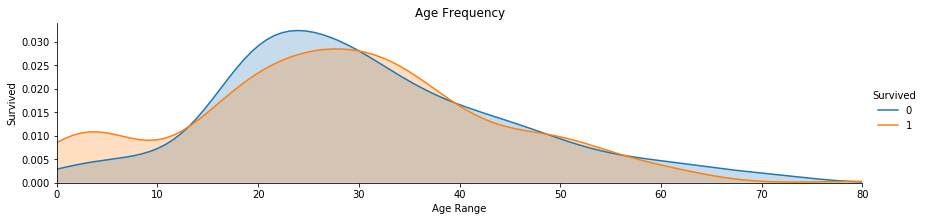

In [44]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
axes = facet.axes.flatten()
axes[0].set_title("Age Frequency")
axes = facet.axes.flatten()
axes[0].set_ylabel("Survived")
for ax in axes:
    ax.set_xlabel("Age Range")
facet.add_legend()

#36 Sobreviventes baseados no preço do ticket

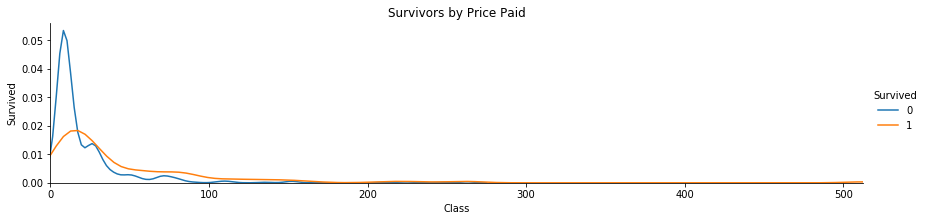

In [49]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= False,)
facet.set(xlim=(0, df['Fare'].max()))
axes = facet.axes.flatten()
axes[0].set_title("Survivors by Price Paid")
axes = facet.axes.flatten()
axes[0].set_ylabel("Survived")
for ax in axes:
    ax.set_xlabel("Class")
facet.add_legend() 

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#37 Visualizar sobreviventes por genero

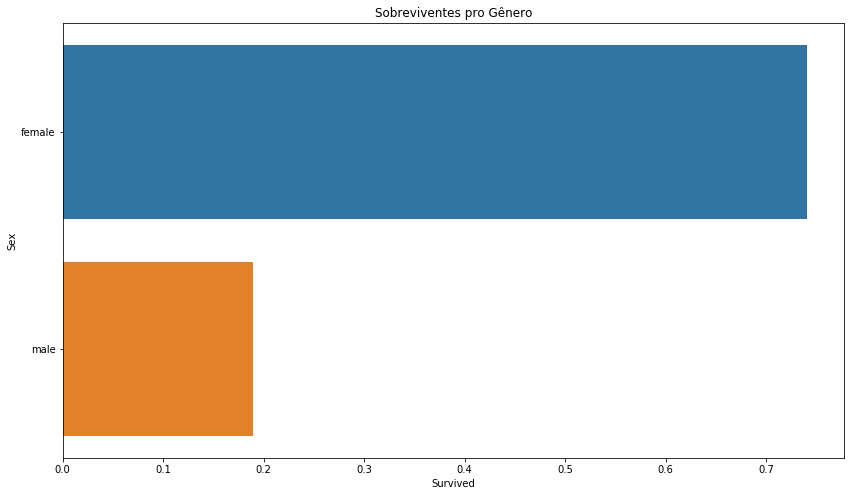

In [53]:
fig, axis1 = plt.subplots(1,1,figsize=(14,8)) 
plt.title('Sobreviventes pro Gênero')
average_age = df[["Survived","Sex"]].groupby(['Sex'],as_index=False).mean()
sns.barplot(x='Survived', y='Sex', data=average_age)

#38 Find Adults Females that survived from the 1st Class that board in Queenstown 

In [206]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)

There are 1 Adults Females that survived from the 1st Class that board in Queenstown 


#39 Find Adults Females that survived from the 1st Class that board in Cherborough 

In [207]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 1st Class that board in Cherborough '.format(qty)
print(qty)

There are 38 Adults Females that survived from the 1st Class that board in Cherborough 


#40 Find Adults Females that survived from the 1st Class that board in Southhampton 

In [208]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)

There are 40 Adults Females that survived from the 1st Class that board in Southampton 


#41 How many Adults Females survived from the 2nd Class that board in Queenstown?

In [210]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 2 Adults Females that survived from the 2nd Class that board in Queenstown 


#42 How many Adults Females that survived from the 2nd Class board in Cherborough?

In [211]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 4 Adults Females that survived from the 2nd Class that board in Cherborough 


#43 How many Adults Females that survived from the 1st Class board in Queenstown?

In [212]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)

There are 50 Adults Females that survived from the 2nd Class that board in Southampton 


#44 How many Adults Females that survived from the 3rd Class  board in Queenstown?

In [213]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 21 Adults Females that survived from the 3rd Class that board in Queenstown 


#45 How many Adults Females that survived from the 3rd Class board in Cherborough?

In [214]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)

There are 6 Adults Females that survived from the 3rd Class that board in Cherborough 


#46 How many Adults Females that survived from the 3rd Class that board in Queenstown?

In [215]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Females that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)

There are 23 Adults Females that survived from the 3rd Class that board in Southampton 


#47 How many Adults Males that survived from the 1st Class board in Queenstown?

In [216]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)

There are 0 Adults Males that survived from the 1st Class that board in Queenstown 


#48 How many Adults Males that survived from the 1st Class board in Cherborough?

In [217]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 1st Class that board in Cherborough '.format(qty)
print(qty)

There are 16 Adults Males that survived from the 1st Class that board in Cherborough 


#49 How many Adults Males that survived from the 1st Class board in Southhampton?

In [218]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)

There are 25 Adults Males that survived from the 1st Class that board in Southampton 


#50 How many Adults Males that survived from the 2nd Class board in Queenstown?

In [219]:
ffc_sur = df[(df.Sex == 'Male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 Adults Males that survived from the 2nd Class that board in Queenstown 


#51 How many Adults Males that survived from the 2nd Class board in Queenstown? 

In [220]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 1 Adults Males that survived from the 2nd Class that board in Cherborough 


#52 How many Adults Males that survived from the 1st Class board in Queenstown? 

In [221]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)

There are 7 Adults Males that survived from the 2nd Class that board in Southampton 


#53 How many Adults Males that survived from the 3rd Class board in Queenstown?

In [222]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 3 Adults Males that survived from the 3rd Class that board in Queenstown 


#54 How many Adults Males that survived from the 3rd Class board in Cherborough?

In [223]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)

There are 8 Adults Males that survived from the 3rd Class that board in Cherborough 


#55 How many Adults Males that survived from the 3rd Class board in Queenstown?

In [224]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age > 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} Adults Males that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)

There are 25 Adults Males that survived from the 3rd Class that board in Southampton 



# CHILDREN

# 1st Class
#GIRLS 

#56 How many girls that survived from the 1st Class board in Queenstown? 

In [225]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)

There are 0 girls that survived from the 1st Class that board in Queenstown 


#57 How many girls that survived from the 2nd Class board in Cherborough?

In [226]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 3 girls that survived from the 2nd Class that board in Cherborough 


#58 How many girls that survived from the 1st Class that in Queenstown? 

In [227]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)

There are 6 girls that survived from the 1st Class that board in Southampton 


# 2nd
#59 How many girls that survived from the 2nd Class board in Queenstown?

In [228]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 girls that survived from the 2nd Class that board in Queenstown 


#60 How many girls that survived from the 2nd Class board in Cherborough?

In [229]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 3 girls that survived from the 2nd Class that board in Cherborough 


#61 How many girls that survived from the 2nd Class board in Southhampton?

In [230]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)

There are 11 girls that survived from the 2nd Class that board in Southampton 


# 3rd
#62 How many girls that survived from the 2nd Class that board in Queenstown? 

In [231]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 3 girls that survived from the 3rd Class that board in Queenstown 


#63 How many girls that survived from the 2nd Class board in Cherborough?

In [232]:
ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)  

There are 9 girls that survived from the 3rd Class that board in Cherborough 


#64 How many girls that survived from the 2nd Class board in Queenstown?

In [234]:

ffc_sur = df[(df.Sex == 'female') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} girls that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)

There are 10 girls that survived from the 3rd Class that board in Southampton 


 # CHILDREN  - BOYS

# 1st


#65 How many boys that survived from the 1st Class board in Queenstown?

In [235]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 1st Class that board in Queenstown '.format(qty)
print(qty)

There are 0 boys that survived from the 1st Class that board in Queenstown 


#66 How many boys that survived from the 1st Class that in Cherborough?

In [236]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 1st Class that board in Cherborough '.format(qty)
print(qty)

There are 1 boys that survived from the 1st Class that board in Cherborough 


#67 How many boys that survived from the 1st Class board in Queenstown?

In [237]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 1) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 1st Class that board in Southampton '.format(qty)
print(qty)

There are 3 boys that survived from the 1st Class that board in Southampton 


# 2nd
#68 How many boys that survived from the 2nd Class board in Queenstown? 

In [238]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 2nd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 boys that survived from the 2nd Class that board in Queenstown 


#69 How many boys that survived from the 2nd Class that in Cherborough?

In [239]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 2nd Class that board in Cherborough '.format(qty)
print(qty)

There are 1 boys that survived from the 2nd Class that board in Cherborough 


#70 How many boys that survived from the 2nd Class board in Southhampton?

In [240]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 2) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 2nd Class that board in Southampton '.format(qty)
print(qty)

There are 8 boys that survived from the 2nd Class that board in Southampton 


# 3rd
#71 How many boys that survived from the 2nd Class board in Queenstown? 

In [241]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'Q')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 3rd Class that board in Queenstown '.format(qty)
print(qty)

There are 0 boys that survived from the 3rd Class that board in Queenstown 


#72 How many boys that survived from the 2nd Class that in Cherborough?

In [243]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'C')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 3rd Class that board in Cherborough '.format(qty)
print(qty)

There are 2 boys that survived from the 3rd Class that board in Cherborough 


#73 How many boys that survived from the 2nd Class board in Queenstown?

In [244]:
ffc_sur = df[(df.Sex == 'male') & (df.Survived == 1) & (df.Pclass == 3) & (df.Age <= 18) & (df.Embarked == 'S')]
third_class = ffc_sur
qty = (len(third_class))
qty = 'There are {} boys that survived from the 3rd Class that board in Southampton '.format(qty)
print(qty)

There are 9 boys that survived from the 3rd Class that board in Southampton 


#74 Qual a idade média dos sobreviventes do naufrágio?
#75 Qual a idade média das vítimas do naufrágio?

In [245]:
df.groupby("Survived").agg({"Age" : np.mean})

,Age
Survived,
0,30.240437
1,28.300000


#76 Qual a idade do sobrevivente mais novo?
#77 Qual a idade da vítima mais nova?

In [247]:
df.groupby('Survived').agg({'Age' : np.min})

,Age
Survived,
0,1
1,0


#77 Qual a idade do sobrevivente mais idoso?
#78 Qual a idade da vítima mais idosa?

In [248]:
df.groupby("Survived").agg({"Age" : np.max})

,Age
Survived,
0,74
1,80


#79 Qual a porcentagem de sobreviventes em cada classe do navio?

In [249]:
class_1 = df[(df.Survived == 1) & (df.Pclass == 1)]
s_total = (len(class_1))
per = s_total / 288 * 100
per 

46.52777777777778

In [250]:
class_2 = df[(df.Survived == 1) & (df.Pclass == 2)]
s_total = (len(class_2))
per = s_total / 288 * 100
per 

30.208333333333332

In [251]:
class_3 = df[(df.Survived == 1) & (df.Pclass == 3)]
s_total = (len(class_3))
per = s_total / 288 * 100
per 

41.31944444444444

#80 Qual a porcentagem de sobreviventes entre as crianças?

In [51]:
children = df[(df.Survived == 1) & (df.Age <= 18)]
s_total = (len(children))
per = s_total / 139 * 100
per 

50.35971223021583

#81 Qual a porcentagem de sobreviventes entre as mulheres?

In [50]:
women = df[(df.Survived == 1) & (df.Age > 18) & (df.Sex == 'female')]
s_total = (len(women))
per = s_total / 191 * 100
per 

78.01047120418848

#82 Qual a porcentagem de sobreviventes entre os homens?

In [254]:
men = df[(df.Survived == 1) & (df.Age > 18) & (df.Sex == 'male')]
s_total = (len(men))
per = s_total / 382 * 100
per 

22.25130890052356

#83 Qual a porcentagem de sobreviventes entre os idosos?

In [255]:
#calulate elderly
old = df[(df.Age >= 65)]
old = (len(old))
print(old)

11


In [256]:
elderly = df[(df.Survived == 1) & (df.Age > 65) & (df.Sex == 'male')]
s_total = (len(elderly))
per = s_total / 11 * 100
per 

9.090909090909092

#84 Qual a porcentagem de sobreviventes entre os que viajavam com a família?

In [257]:
had_family = df[(df.Survived == 1) & (df.Parch != 0)]
s_total = (len(had_family))
per = s_total / 288 * 100
per 

37.84722222222222

#85 Qual a porcentagem de sobreviventes entre os que viajavam desacompanhados?

In [258]:
no_family = df[(df.Survived == 1) & (df.Parch == 0)]
s_total = (len(no_family))
per = s_total / 288 * 100
per 

80.20833333333334

#Quais fatores contribuíram para a sobrevivência dos passageiros a bordo?

#Embarcar em Southampton
#Estar na primeira classe 
#Ser mulher ou criança
#Não possuir parentes

# Conclusões 

Pode-se verificar que os passageiros da Primeira classe tiveram a porcentagem maior
de sobreviventes. 
Aqueles que não possuíam parentes também tiveram uma chance maior de sobreviverem, 
talvez devido ao fato que não tinham a preocupação de encontrar familiares no momento de angústia.
Eles representam 80% dos sobreviventes contra 38% dos que tinham familiares a bordo.
Das crianças a bordo, os sobreviventes foram 50% e as mulheres 78%.

# Limitações

Encontrei diversos campos sem registros e conflitantes.
Removi colunas que eram irrelevantes para a análise de dados, tais como: Cabin e Ticket.